In [6]:
!PYTHONPATH=../../src:$PYTHONPATH

In [21]:
dir_name ='vanilla-100-standard-stones'
import numpy as np
import json
from matplotlib import pyplot as plt
TNUM = 100

In [17]:
finished = np.zeros(TNUM,dtype=bool)
times = np.zeros(TNUM)
iters = np.zeros(TNUM)
steps = np.zeros(TNUM)


In [18]:
for i in range(TNUM):
    try:
        with open(f'{dir_name}/test_{i+1}.analytics') as f:
            data = json.load(f)
            times[i] = data['tot_time']
            iters[i] = data['storage_data']['nn_queries']
            steps[i] = data['planner_data']['SUM_STEP_CNT']
            finished[i] = iters[i] < 15000
    except:
        pass

In [20]:
print (f'Finished: {np.sum(finished)}')
print (f'Avg time: {np.mean(times[finished])}')
print (f'Avg iters: {np.mean(iters[finished])}')
print (f'Avg steps: {np.mean(steps[finished])}')

Finished: 91
Avg time: 335.0336755291446
Avg iters: 6230.373626373626
Avg steps: 270989.4285714286


In [37]:
y = np.arange(TNUM)
x_iters = np.sort(iters)
x_steps = np.sort(steps)
x_times = np.sort(times)

Text(0.5, 1.0, 'Time')

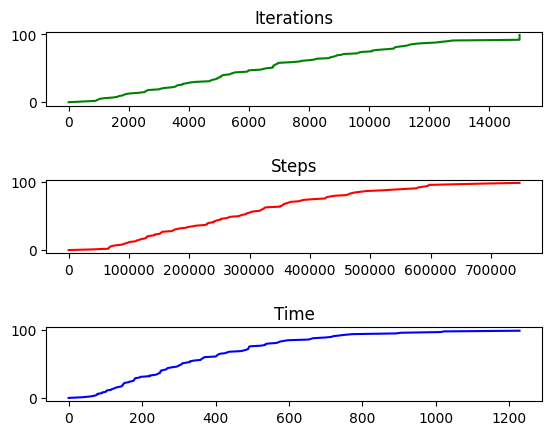

In [41]:
fig,ax =plt.subplots(3)
plt.subplots_adjust(hspace=1)
ax[0].plot(x_iters,y,'g-',label='Iterations')
ax[0].set_title('Iterations')
ax[1].plot(x_steps,y,'r-',label='Steps')
ax[1].set_title('Steps')
ax[2].plot(x_times,y,'b-',label='Time')
ax[2].set_title('Time')

In [52]:
histogram_iter = np.histogram(iters,bins=15)
histogram_steps = np.histogram(steps,bins=25)
histogram_times = np.histogram(times,bins=15)


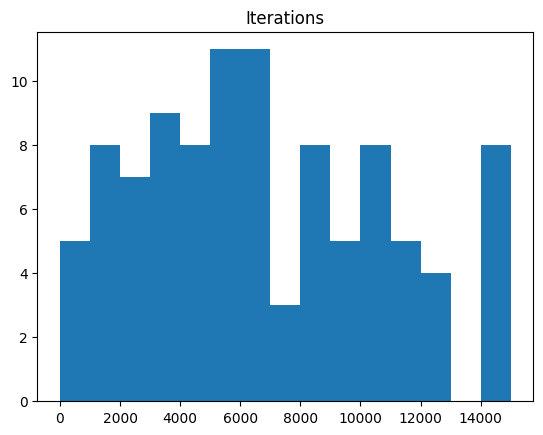

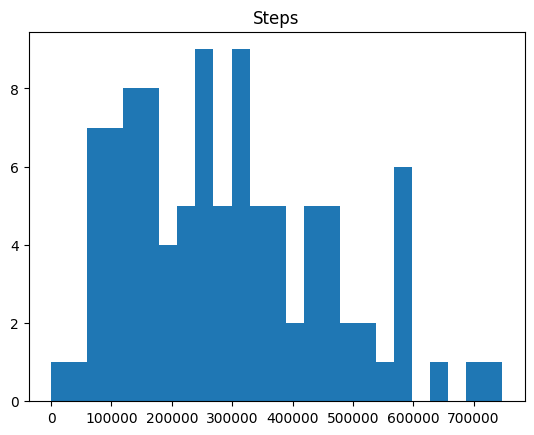

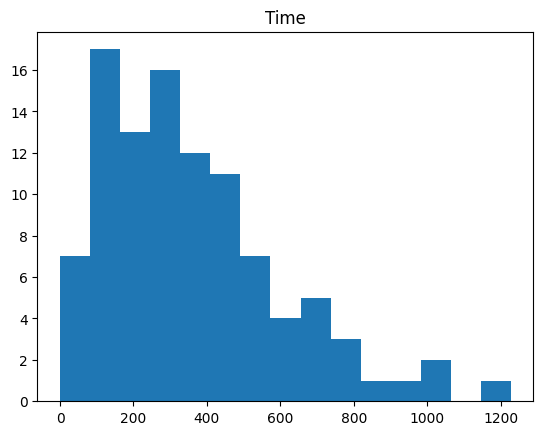

In [53]:
plt.hist(iters,bins=15)
plt.title('Iterations')
plt.show()
plt.hist(steps,bins=25)
plt.title('Steps')
plt.show()
plt.hist(times,bins=15)
plt.title('Time')
plt.show()